<a href="https://colab.research.google.com/github/Abbessi-zouhour/drug_solubility/blob/master/solubility3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install py3Dmol rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 65.2 MB/s eta 0:00:00


In [2]:
!pip install "numpy<2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 67.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
!pip install deepchem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 24.8 MB/s eta 0:00:00


In [ ]:
!pip install rdkit-pypi

^C


In [ ]:
!pip install "numpy<2"
!pip install rdkit-pypi

In [5]:
!pip install deepchem

In [ ]:
!pip install py3Dmol

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


ESOL Dataset Tasks: ['measured log solubility in mols per litre']
Number of training samples: 902
Number of validation samples: 113
Number of test samples: 113

Solubility (logS) Statistics:
Mean: 0.01
Min: -4.09
Max: 2.23
Std Dev: 1.01


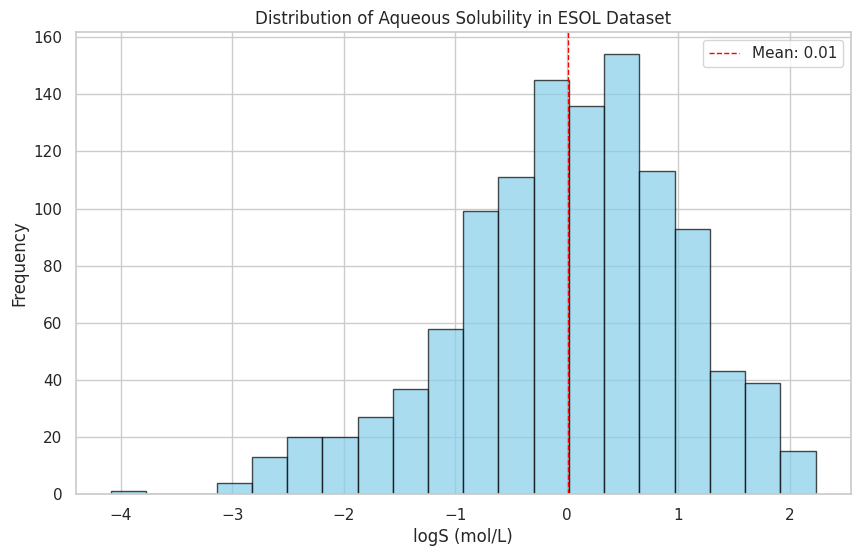

SMILES,Structure,Property
CCC,,logS: 0.543
Clc1ccc(c(Cl)c1)c2ccc(Cl)c(Cl)c2Cl,,logS: -2.267
Cn2c(=O)on(c1ccc(Cl)c(Cl)c1)c2=O,,logS: 0.121
OC1C=CC2C1C3(Cl)C(=C(Cl)C2(Cl)C3(Cl)Cl)Cl,,logS: -1.145
COP(=O)(OC)OC(Br)C(Cl)(Cl)Br,,logS: 0.380
c1cnc2c(c1)ccc3ncccc23,,logS: 0.188
CC1CCCCC1NC(=O)Nc2ccccc2,,logS: -0.498
O=C1NCCN1c2ncc(s2)N(=O)=O,,logS: -0.071
CCCC(C)C1(CC=C)C(=O)NC(=S)NC1=O,,logS: -0.186
c2ccc1nc(ccc1c2)c4ccc3ccccc3n4,,logS: -1.116

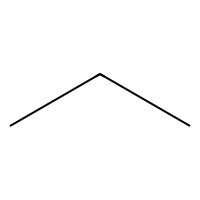
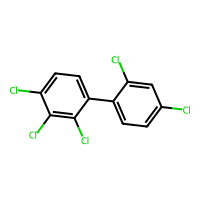
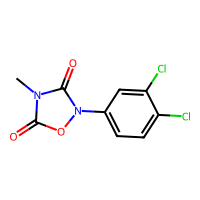
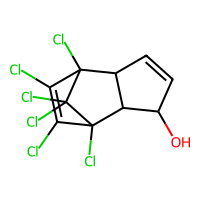
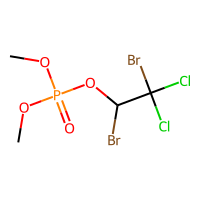
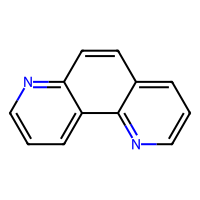
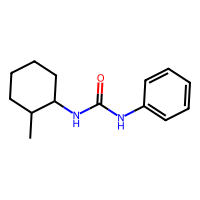
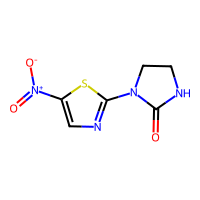
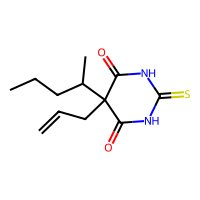
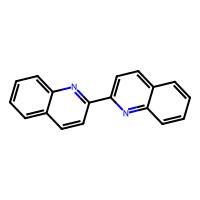

Test MSE: 1.5327
Test RMSE: 1.2380


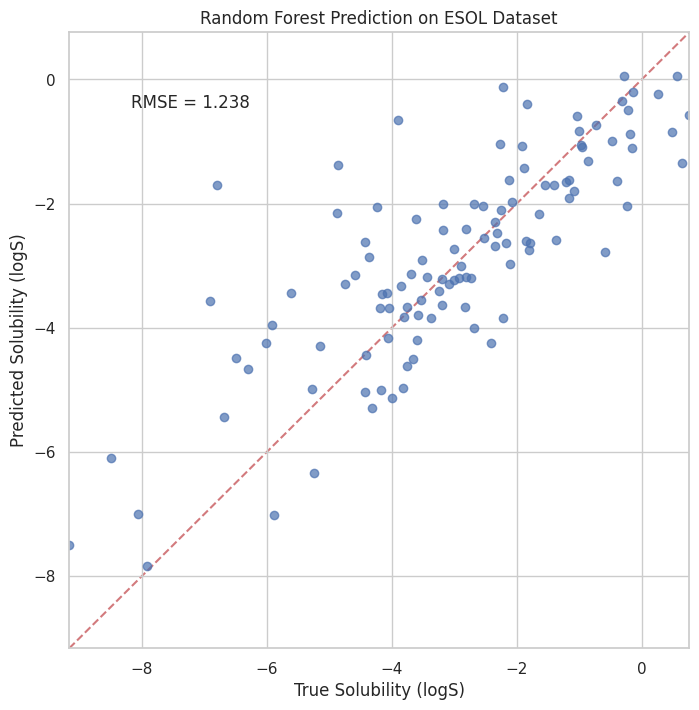


💧 Displaying ALL train molecules in 3D with titles:
Train molecule #1


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Train molecule #2


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Train molecule #3


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Train molecule #4


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Train molecule #5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Train molecule #6


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Train molecule #7


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Train molecule #8


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Train molecule #9


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Train molecule #10


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [1]:
# ------------------ Imports ------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw
import io, base64
from PIL import Image
from IPython.display import HTML, display
import warnings

import deepchem as dc
from deepchem.feat import CircularFingerprint
from deepchem.molnet import load_delaney
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

from rdkit import rdBase
rdBase.DisableLog('rdApp.warning')
warnings.filterwarnings('ignore', category=UserWarning, module='deepchem')

# ------------------ Function for table ------------------
def create_molecule_table(dataset, n=12, label_type='regression', task_name=None):
    data = []
    num_to_display = min(n, len(dataset))

    for i in range(num_to_display):
        smi = dataset.ids[i]
        mol = Chem.MolFromSmiles(smi)

        img_html = "Invalid SMILES"
        if mol is not None:
            try:
                img = Draw.MolToImage(mol, size=(200, 200))
                buf = io.BytesIO()
                img.save(buf, format="PNG")
                img_b64 = base64.b64encode(buf.getvalue()).decode('utf-8')
                img_html = f'<img src="data:image/png;base64,{img_b64}" width="200" height="200"/>'
            except Exception as e:
                img_html = f"Image Generation Error: {e}"

        label_val = dataset.y[i]
        label_str = "N/A"
        if label_val is not None and hasattr(label_val, '__len__') and len(label_val) > 0:
            val_to_format = label_val[0]
            if label_type == 'regression':
                try:
                    label_str = f"{val_to_format:.3f}"
                except (TypeError, ValueError):
                    label_str = str(val_to_format)
            elif label_type == 'classification':
                try:
                    label_str = "Active" if int(val_to_format) == 1 else "Inactive"
                except (TypeError, ValueError):
                    label_str = str(val_to_format)
            else:
                label_str = str(val_to_format)
        elif label_val is not None:
            label_str = str(label_val)

        property_label = f"{task_name}: {label_str}" if task_name else label_str
        data.append([smi, img_html, property_label])

    df = pd.DataFrame(data, columns=["SMILES", "Structure", "Property"])
    return df

# ------------------ Load ESOL dataset ------------------
tasks_esol, datasets_esol_raw, transformers_esol = load_delaney(
    featurizer='Raw',
    splitter='random',
    reload=True
)
train_esol_raw, valid_esol_raw, test_esol_raw = datasets_esol_raw

print(f"ESOL Dataset Tasks: {tasks_esol}")
print(f"Number of training samples: {len(train_esol_raw)}")
print(f"Number of validation samples: {len(valid_esol_raw)}")
print(f"Number of test samples: {len(test_esol_raw)}")

y_all_esol = np.concatenate([train_esol_raw.y, valid_esol_raw.y, test_esol_raw.y])
print("\nSolubility (logS) Statistics:")
print(f"Mean: {np.mean(y_all_esol):.2f}")
print(f"Min: {np.min(y_all_esol):.2f}")
print(f"Max: {np.max(y_all_esol):.2f}")
print(f"Std Dev: {np.std(y_all_esol):.2f}")

plt.figure(figsize=(10, 6))
plt.hist(y_all_esol, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(y_all_esol), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(y_all_esol):.2f}')
plt.xlabel('logS (mol/L)')
plt.ylabel('Frequency')
plt.title('Distribution of Aqueous Solubility in ESOL Dataset')
plt.legend()
plt.show()

df_esol = create_molecule_table(train_esol_raw, n=10, label_type='regression', task_name='logS')
try:
    display(HTML(df_esol.to_html(escape=False, index=False)))
except NameError:
    print(df_esol.to_string())

# ------------------ ECFP featurization & modeling ------------------
featurizer_esol = CircularFingerprint(radius=2, size=1024)
tasks_esol, datasets_esol, transformers_esol = load_delaney(
    featurizer=featurizer_esol,
    splitter='random',
    transformers=[],
    reload=True
)
train_esol, valid_esol, test_esol = datasets_esol

rf_esol = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_esol = dc.models.SklearnModel(rf_esol)
model_esol.fit(train_esol)

preds_esol = model_esol.predict(test_esol).flatten()
y_true_esol = test_esol.y.flatten()

mse_esol = mean_squared_error(y_true_esol, preds_esol)
rmse_esol = np.sqrt(mse_esol)
print(f"Test MSE: {mse_esol:.4f}")
print(f"Test RMSE: {rmse_esol:.4f}")

plt.figure(figsize=(8, 8))
plt.scatter(y_true_esol, preds_esol, alpha=0.7)
plt.xlabel("True Solubility (logS)")
plt.ylabel("Predicted Solubility (logS)")
plt.title("Random Forest Prediction on ESOL Dataset")
lims = [min(np.min(y_true_esol), np.min(preds_esol)), max(np.max(y_true_esol), np.max(preds_esol))]
plt.plot(lims, lims, 'r--', alpha=0.75, zorder=0)
plt.xlim(lims)
plt.ylim(lims)
plt.grid(True)
plt.text(lims[0]*0.9+lims[1]*0.1, lims[1]*0.9+lims[0]*0.1, f'RMSE = {rmse_esol:.3f}', ha='left', va='top')
plt.show()

# ------------------ 3D visualization for all molecules ------------------
import py3Dmol
from rdkit.Chem import AllChem

def show_3d_structure(smiles, title="Molecule"):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.UFFOptimizeMolecule(mol)
    mb = Chem.MolToMolBlock(mol)

    viewer = py3Dmol.view(width=400, height=400)
    viewer.addModel(mb, "mol")
    viewer.setStyle({'stick': {}})
    viewer.setBackgroundColor('0xeeeeee')
    viewer.zoomTo()
    viewer.setTitle(title)
    viewer.show()

# Loop through all train molecules and display in 3D
print("\n💧 Displaying ALL train molecules in 3D with titles:")

for i, smi in enumerate(train_esol_raw.ids[:10]):
    mol_title = f"Train molecule #{i+1}"
    print(mol_title)
    show_3d_structure(smi, title=mol_title)
